<a href="https://colab.research.google.com/github/Alam710/Python_Basic_and_exam_machine_learning_MTI/blob/master/Islam_Nur_Alam_UAS_No_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
with open("/content/drive/MyDrive/UAS_ML/nomor_3.csv") as f:
  ncols = len(f.readline().split(','))
X = np.genfromtxt('/content/drive/MyDrive/UAS_ML/nomor_3.csv', dtype=float, delimiter=',', skip_header=1, usecols=range(1,3))
print(X)

[[2.25 3.47]
 [4.71 3.6 ]
 [3.17 4.96]
 [2.32 1.63]
 [2.31 2.09]
 [1.14 2.11]
 [1.9  0.97]
 [1.76 0.84]
 [5.02 3.02]
 [5.74 3.84]]


In [ ]:
X.shape

(10, 2)

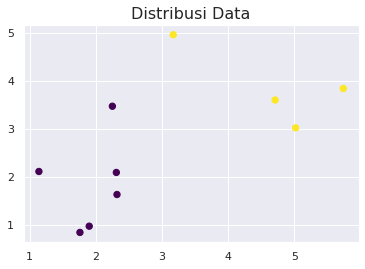

In [ ]:
from sklearn import mixture
vectorizer = np.vectorize(lambda x: X[x % len(X)])
gmm = mixture.GaussianMixture(n_components=2).fit(X)
labels = gmm.predict(X)
plt.title("Distribusi Data", fontsize=16)
plt.scatter(X[:,0], X[:,1], c=labels, s=40, cmap='viridis');

In [ ]:
from matplotlib.patches import Ellipse
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))  
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:,0], X[:,1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:,0], X[:,1], s=40, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

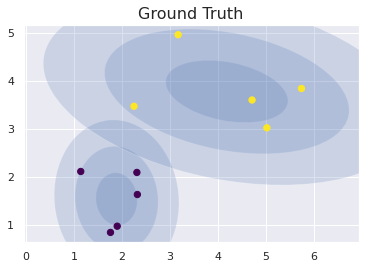

In [ ]:
gmm = mixture.GaussianMixture(n_components=2, random_state=42)
plt.title("Ground Truth", fontsize=16)
plot_gmm(gmm, X)

In [ ]:
print("Converged: ", gmm.converged_)
print("\n")
print(gmm.means_)
print('\n')
print(gmm.covariances_)
print('\n')

Converged:  True


[[1.88724926 1.53502109]
 [4.18433765 3.77838838]]


[[[ 0.18791365 -0.01192258]
  [-0.01192258  0.30290925]]

 [[ 1.62635252 -0.24822827]
  [-0.24822827  0.42276968]]]




In [ ]:
probs = gmm.predict(X)
print(probs[:11])

[1 1 1 0 0 0 0 0 1 1]
